In [67]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [68]:
folder_path = "/Users/oas/Downloads/benchmarking_results"
# folder_path = "/Users/oas/Documents/VOD/vod/benchmarking_results"
files = [
    os.path.join(folder_path, file)
    for file in os.listdir(folder_path)
    if os.path.isfile(os.path.join(folder_path, file))
]
files.sort()  # Sort the files by name
newest_file = files[-1]  # Pick the newest
print(newest_file)

/Users/oas/Downloads/benchmarking_results/2024-02-19-16-08-09.csv


In [69]:
df_results = pd.read_csv(newest_file)
df_results.shape

(15, 16)

In [70]:
df_results

,Unnamed: 0,Dataset,Index,Index parameters.,Server startup speed (s),Index build speed (s),Search speed avg. (ms),Search speed p95 (ms),Recall avg,Recall@1,Recall@10,Recall@100,ingesting_max,ingesting_mean,benchmarking_max,benchmarking_mean
0,0,gist-960-euclidean,"index: faiss IVF, n_partition=100, None, DOT","IVF, n_partition=100, None, DOT",29.550785,12.196287,466.127652,503.796797,0.000287,0.0,0.000333,0.002000,983.900,493.225000,4151.296,4151.296000
1,1,gist-960-euclidean,"index: faiss IVF, n_partition=200, None, DOT","IVF, n_partition=200, None, DOT",28.922641,14.341038,266.225075,301.910465,0.000343,0.0,0.000333,0.002667,1496.064,625.766000,4152.320,4152.101685
2,2,gist-960-euclidean,"index: faiss IVF, n_partition=400, None, DOT","IVF, n_partition=400, None, DOT",29.018335,20.753354,148.021285,172.958851,0.000443,0.0,0.000333,0.004333,1271.808,567.402000,4152.320,4152.320000
3,3,gist-960-euclidean,"index: faiss IVF, n_partition=800, None, DOT","IVF, n_partition=800, None, DOT",29.157651,35.677776,85.032358,101.179235,0.000610,0.0,0.000667,0.005667,1212.416,551.979000,4154.368,4154.368000
4,4,gist-960-euclidean,"index: faiss IVF, n_partition=1600, None, DOT","IVF, n_partition=1600, None, DOT",28.945927,77.733385,46.192698,54.709877,0.000780,0.0,0.001333,0.007667,3171.328,888.065600,4157.440,4157.440000
5,5,gist-960-euclidean,"faiss IVF, n_partition=100, PQ8, DOT",error: Traceback (most recent call last):\n F...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000,-1.000000,-1.000,-1.000000
6,6,gist-960-euclidean,"faiss IVF, n_partition=200, PQ8, DOT",error: Traceback (most recent call last):\n F...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000,-1.000000,-1.000,-1.000000
7,7,gist-960-euclidean,"index: faiss IVF, n_partition=400, PQ8, DOT",error: Traceback (most recent call last):\n F...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.0,-1.000000,-1.000000,-1.000,-1.000000,-1.000,-1.000000
8,8,gist-960-euclidean,"index: faiss IVF, n_partition=800, PQ8, DOT","IVF, n_partition=800, PQ8, DOT",7.938129,520.221030,10.384226,13.416402,0.001517,0.0,0.000333,0.003667,416.900,333.666667,502.900,502.728571
9,9,gist-960-euclidean,"index: faiss IVF, n_partition=1600, PQ8, DOT","IVF, n_partition=1600, PQ8, DOT",7.961683,464.687658,9.734543,12.800980,0.001897,0.0,0.000000,0.002667,416.300,332.666667,505.700,505.617460


In [71]:
df_results = df_results.query("Index != 'None'")  # ignore failed runs
df_results = df_results.query("benchmarking_mean != -1")  # ignore failed runs

In [72]:
df_results["index_prov"] = df_results.Index.str.split(" ").apply(lambda l: l[1])

In [73]:
df_results = df_results.dropna()

In [74]:
df_results.columns

Index(['Unnamed: 0', 'Dataset', 'Index', 'Index parameters.',
       'Server startup speed (s)', 'Index build speed (s)',
       'Search speed avg. (ms)', 'Search speed p95 (ms)', 'Recall avg',
       'Recall@1', 'Recall@10', 'Recall@100', 'ingesting_max',
       'ingesting_mean', 'benchmarking_max', 'benchmarking_mean',
       'index_prov'],
      dtype='object')

In [75]:
df_results.shape

(12, 17)

In [76]:
# df_results[df_results.isna()]

In [77]:
import plotly.express as px
import plotly.graph_objects as go

# Your existing DataFrame and plot
fig = px.scatter(
    df_results,
    x="Recall avg",
    y="Search speed avg. (ms)",
    hover_data=["Index","ingesting_max","benchmarking_mean"],
    color="index_prov",
    size=df_results["benchmarking_mean"],
)

# Adding a similar scatter plot but with semi-transparency and different size mapping
fig.add_trace(
    go.Scatter(
        x=df_results["Recall avg"],
        y=df_results["Search speed avg. (ms)"],
        mode="markers",
        marker=dict(
            size=df_results["ingesting_max"] / 25,  # Size based on 'ingesting_max' column
            opacity=0.1,  # Semi-transparent markers
            # color=fig.data[0].marker.color,  # Use the same color as the first plot
            # line=dict(color="MediumPurple", width=2),
        ),
        hoverinfo="text",  # You can customize hover info as needed
        name="Ingesting max",
    )
)

fig.show()

In [78]:
df_results[["IndexProvider", "IndexType", "nPartitions", "Compression", "Metric"]] = df_results.Index.str.replace(",", "").str.replace("=", " ").str.split(" ", expand=True)[[1, 2, 4, 5, 6]]

In [79]:
df_results.columns

Index(['Unnamed: 0', 'Dataset', 'Index', 'Index parameters.',
       'Server startup speed (s)', 'Index build speed (s)',
       'Search speed avg. (ms)', 'Search speed p95 (ms)', 'Recall avg',
       'Recall@1', 'Recall@10', 'Recall@100', 'ingesting_max',
       'ingesting_mean', 'benchmarking_max', 'benchmarking_mean', 'index_prov',
       'IndexProvider', 'IndexType', 'nPartitions', 'Compression', 'Metric'],
      dtype='object')

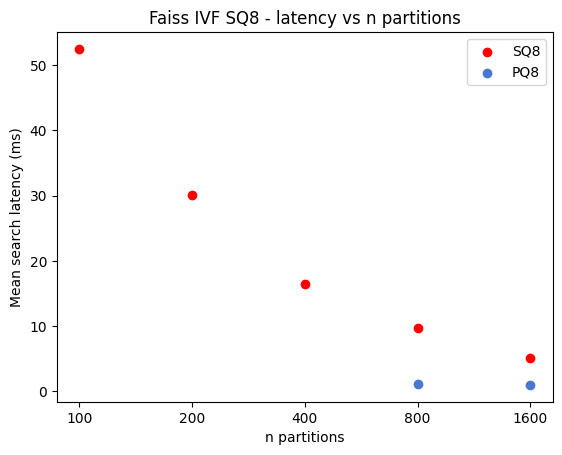

In [80]:
df_plot = df_results.query("Compression == 'SQ8'")
plt.scatter(df_plot.nPartitions, df_plot["Search speed avg. (ms)"]/10, label="SQ8", c="red")
df_plot = df_results.query("Compression == 'PQ8'")
plt.scatter(df_plot.nPartitions, df_plot["Search speed avg. (ms)"]/10, label="PQ8")
plt.title("Faiss IVF SQ8 - latency vs n partitions")
plt.xlabel("n partitions")
plt.ylabel("Mean search latency (ms)")
plt.legend()
plt.show()

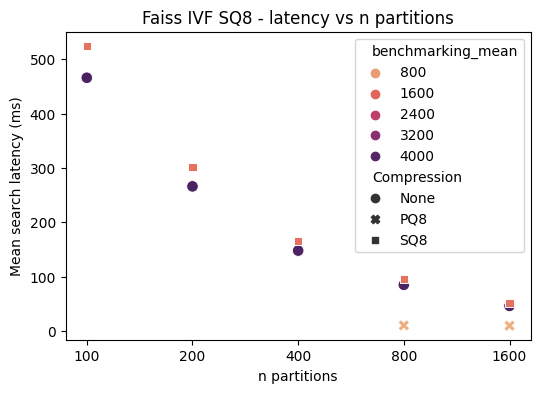

In [94]:
import seaborn as sns

plt.figure(figsize=(6,4))
sns.scatterplot(data=df_results, x="nPartitions", y="Search speed avg. (ms)", hue="benchmarking_mean", style="Compression", palette="flare", s=70)
plt.title("Faiss IVF SQ8 - latency vs n partitions")
plt.xlabel("n partitions")
plt.ylabel("Mean search latency (ms)")
plt.show()